- __Handling Missing Numercala Data__

# Numerical Univariate Data

## Definition
**Numerical univariate data** refers to a dataset that contains **only one variable**, and that variable is **numeric** (number-based).

---

## Examples
- Age of students  
- Salary of employees  
- Temperature readings  
- Marks obtained in an exam  

> Only **one column** and it contains **numerical values**.

---

## Types of Numerical Univariate Data

### 1. Discrete Numerical Data
- Countable values  
- Usually whole numbers (integers)

**Examples:**
- Number of children = 0, 1, 2, 3  
- Number of calls per day  

---

### 2. Continuous Numerical Data
- Can take **any value within a range**  
- Can include decimal values

**Examples:**
- Height = 170.5 cm  
- Weight = 62.8 kg  
- Time = 2.45 hours  

---

## Common Analysis for Numerical Univariate Data

### 1. Descriptive Statistics
Used to summarize numerical data.

| Measure | Description |
|-------|------------|
| Mean | Average value |
| Median | Middle value |
| Mode | Most frequent value |
| Min | Minimum value |
| Max | Maximum value |
| Standard Deviation | Spread of data |

```python
df['age'].describe()


__Mean N Median__

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


# Mean vs Median Imputation

## Mean Imputation

**Definition:**  
Missing values are replaced with the **average (mean)** of the numerical column.

### Advantages
- Simple and easy to implement  
- Computationally fast  
- Preserves overall column mean  
- Works well for normally distributed data  

### Disadvantages
- Highly sensitive to outliers  
- Distorts data distribution  
- Reduces variance  
- Can introduce bias  
- Poor choice for skewed data  

---

## Median Imputation

**Definition:**  
Missing values are replaced with the **middle value (median)** of the numerical column.

### Advantages
- Robust to outliers  
- Suitable for skewed data  
- Preserves central tendency better  
- Commonly preferred in machine learning  

### Disadvantages
- Does not preserve mean  
- Still reduces variance  
- Ignores relationship with other features  
- Slightly higher computation (negligible)  

---

## Mean vs Median Comparison

| Feature | Mean Imputation | Median Imputation |
|-------|----------------|----------------|
| Outlier Sensitivity | High | Low |
| Best for | Normal distribution | Skewed distribution |
| Bias Risk | Higher | Lower |
| Real-world Usage | Less preferred | More preferred |
| Variance Impact | Reduces variance | Reduces variance |

---

## When to Use What?

- Use **Mean Imputation** when data is **symmetrical and outlier-free**
- Use **Median Imputation** when data is **skewed or contains outliers**

---

## Interview One-Liner
> Median imputation is generally preferred over mean imputation because it is robust to outliers and better preserves the data distribution.


In [ ]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\titanic_toy.csv")
df

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().mean()*100

In [ ]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train.isnull().mean()*100

In [ ]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()
mean_Fare = x_train['Fare'].mean()
median_Fare = x_train['Fare'].median()

Fill

In [ ]:
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['fare_mean'] = x_train['Fare'].fillna(mean_age)
x_train['fare_median'] = x_train['Fare'].fillna(mean_age)

In [ ]:
x_train

Check the varience -- > ki data mean or median se kitna dur h 

- Jyda shrink nhi hona chaihye

In [ ]:
print('Original Age Variable variance - ',x_train['Age'].var())
print('Age variance  after median imputation - ',x_train['Age_median'].var())
print('Age variance  after mean imputation',x_train['Age_mean'].var())

print()

print('Original Fare Variable variance - ',x_train['Fare'].var())
print('Fare variance  after median imputation - ',x_train['fare_median'].var())
print('Fare variance  after mean imputation',x_train['fare_mean'].var())




In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
x_train.cov()

In [ ]:
x_train[['Age', 'Age_median', 'Age_mean']].boxplot()

- __Using Sklearn__

In [ ]:
trf = ColumnTransformer ([
    ['t1',SimpleImputer(strategy='median'),['Age']],
    ['t2',SimpleImputer(strategy='mean'),['Fare']]
],remainder='passthrough')

In [ ]:
trf

In [ ]:
trf.fit(x_train)

In [ ]:
trf.named_transformers_['t1'].statistics_

In [ ]:
trf.named_transformers_['t2'].statistics_

In [ ]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

# Arbitrary Value Imputation

## Definition
**Arbitrary Value Imputation** is a missing data handling technique where missing values are replaced with a **fixed constant value** chosen manually, rather than a value derived from the data distribution.

---

## Why It Is Called "Arbitrary"
- The value is **not** mean, median, or mode  
- It is **selected by the data scientist**  
- Often chosen **outside the normal data range**

---

## Example

```python
df['experience'].fillna(-1, inplace=True)


In [40]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\titanic_toy.csv")

In [41]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [42]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [44]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_-1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_-1'] = X_train['Fare'].fillna(-1)



In [45]:
X_train

,Age,Fare,Family,Age_99,Age_-1,Fare_999,Fare_-1
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


In [49]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_-1'].var())

print()

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_-1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484

Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


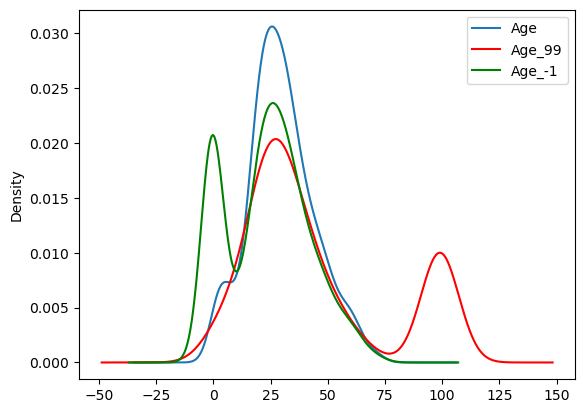

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_-1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
Ratio = pd.concat([
    df['education_level'].value_counts()/len(df),
    df_new['education_level'].value_counts()/len(df_new),
],axis=1)

Ratio.columns=['Original','CCA']

Ratio

,Original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


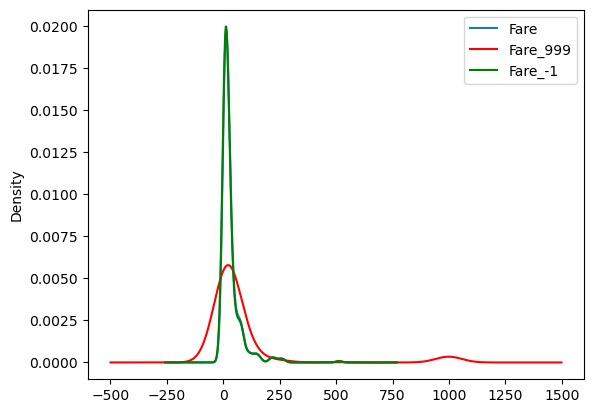

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_-1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

- __End of distribution Imputation__

# End of Distribution Imputation

## Definition
**End of Distribution Imputation** is a technique where missing numerical values are replaced with an **extreme value** located at the **tail (end)** of the data distribution.

Typically, the value is:
- **Below the minimum**, or
- **Above the maximum** of the observed data

---

## How the Value Is Chosen
The imputation value is usually calculated as:

- **Lower end:**  
  $$
  \text{Imputed Value} = \mu - 3\sigma
  $$

- **Upper end:**  
  $$
  \text{Imputed Value} = \mu + 3\sigma
  $$

Where:

- $(\mu)$ = mean  
- $(\sigma)$ = standard deviation  

This ensures the value lies **outside the normal range**.

---

## Example

```python
mean = df['salary'].mean()
std = df['salary'].std()

end_value = mean + 3 * std
df['salary'].fillna(end_value, inplace=True)
